In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [2]:
def show(img, cmap=None):
    plt.figure(figsize=(5, 8))
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.tight_layout()
    plt.show()
        

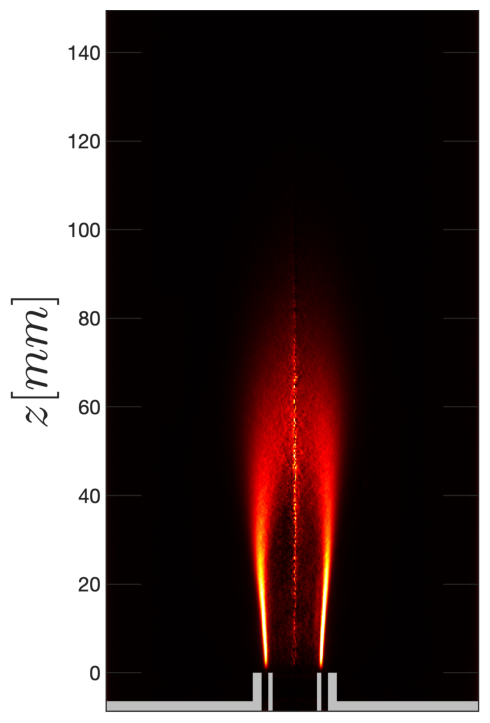

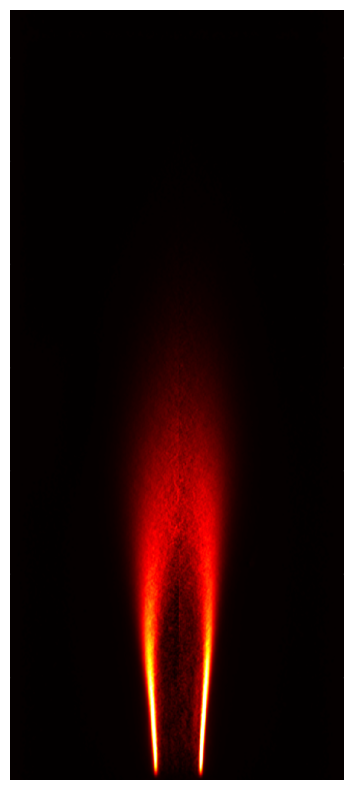

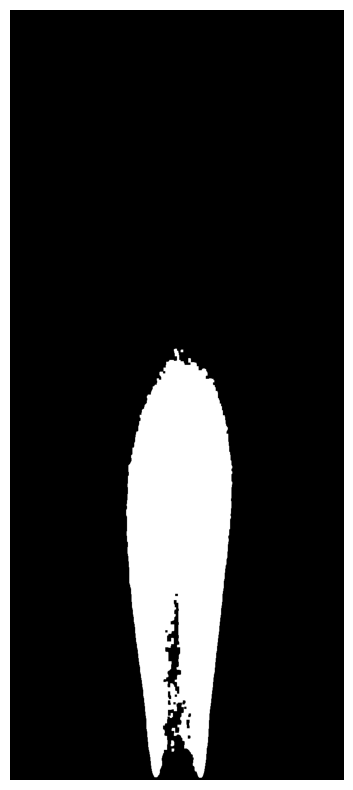

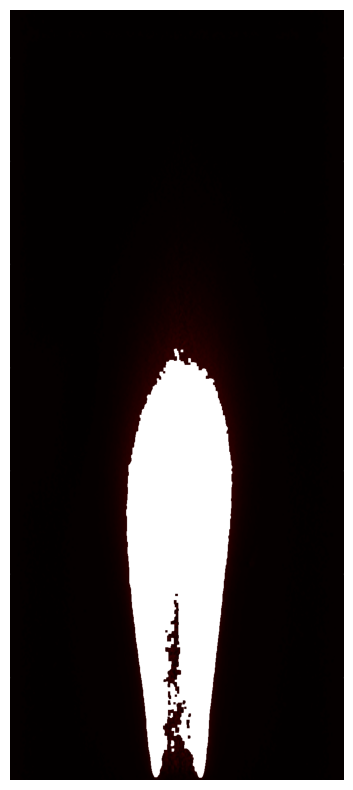

np.float64(82.95652173913044)

In [74]:
def FlameLenght(path, plot=False):
    
    img = cv2.imread(path)
    if len(img[0,:,0])==1219 : img_cropped = np.concatenate((img[6:1718,340:715,:], img[6:1718,758:1125,:]),axis=1)
    if len(img[0,:,0])==1205 : img_cropped = np.concatenate((img[7:1720,343:700,:], img[7:1720,735:1113,:]),axis=1)

    if plot : show(img)
    if plot : show(img_cropped)
    
    gray = gray = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)


    _, flame_mask = cv2.threshold(  
        gray_blur,
        13,          # seuil à ajuster
        255,
        cv2.THRESH_BINARY
    )
    
    kernel = np.ones((5, 5), np.uint8)
    mask_open = cv2.morphologyEx(flame_mask, cv2.MORPH_OPEN, kernel)
    mask_clean = cv2.morphologyEx(mask_open, cv2.MORPH_CLOSE, kernel)
   
    if plot : show(mask_clean, cmap="gray")
    
    scale_pix2mm = 20/230
    Mask1D = np.sum(mask_clean,axis=1)
    flame_rows = np.where(Mask1D > 0)[0]
    start_row = flame_rows[0]   # ligne où la flamme commence
    end_row = flame_rows[-1]    # ligne où la flamme finit
    flame_len_pix = end_row - start_row + 1
    flame_len_mm = flame_len_pix*scale_pix2mm
    
    img_masked = np.where(mask_clean[:, :, None] == 255, 255, img_cropped)
    if plot: show(img_masked)
    
    return(flame_len_mm)
    
FlameLenght(".\d10D15\P4S87S0.png",True)


In [17]:
## For loop 
folder_name = "d10D15"
lenght = {} 
for file_name in os.listdir(folder_name):
    lenght[file_name] = FlameLenght(os.path.join(folder_name, file_name))


In [106]:
folder_name = 'd10D15'
names = []
for file_name in os.listdir(folder_name):
    names.append(file_name[:-4])